In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import h5py
import re

import umap


import torch 

path_to_extracted_features = '/omics/odcf/analysis/OE0585_projects/chromothripsis/histopathology/UKHD_Neuro/RetCLL_Features/1024'


%matplotlib inline



/home/p163v/mambaforge/envs/marugoto/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/p163v/mambaforge/envs/marugoto/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/p163v/mambaforge/envs/marugoto/lib/python3.9/site-packages/uma

In [3]:
import os
os.environ['HTTP_PROXY']="http://www-int.dkfz-heidelberg.de:80"
os.environ['HTTPS_PROXY']="http://www-int.dkfz-heidelberg.de:80"




In [4]:

# Load the data

files = [x for x in os.listdir(path_to_extracted_features) if x.endswith('.h5')]

# with h5py.File(filename, "r") as f:
#     # Print all root level object names (aka keys) 
#     # these can be group or dataset names 
#     print("Keys: %s" % f.keys())
#     # get first object name/key; may or may NOT be a group
#     a_group_key = list(f.keys())[0]

#     # get the object type for a_group_key: usually group or dataset
#     print(type(f[a_group_key])) 

#     # If a_group_key is a group name, 
#     # this gets the object names in the group and returns as a list
#     data = list(f[a_group_key])

#     # If a_group_key is a dataset name, 
#     # this gets the dataset values and returns as a list
#     data = list(f[a_group_key])
#     # preferred methods to get dataset values:
#     ds_obj = f[a_group_key]      # returns as a h5py dataset object
#     ds_arr = f[a_group_key][()]  # returns as a numpy array


In [6]:
tiles_per_pat_all = [h5py.File(path_to_extracted_features+'/'+f, 'r')['feats'].shape[0] for f in files]


<Axes: ylabel='Count'>

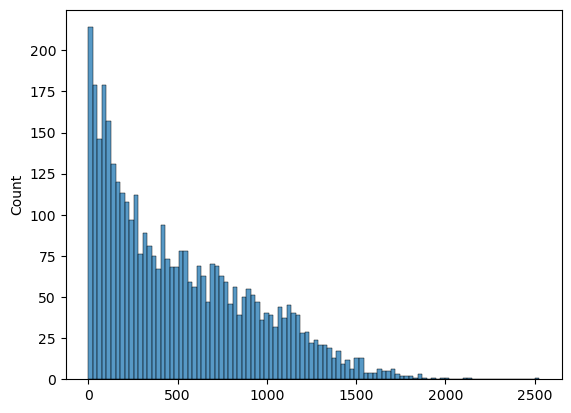

In [7]:
sns.histplot(tiles_per_pat_all, bins=100)

In [10]:
np.sum(np.array(tiles_per_pat_all)<10)

86

In [11]:
pd.DataFrame({"File": files, "Tiles Per Slide": tiles_per_pat_all}).to_csv("../metadata/TilesPerPat_1024.csv")

In [54]:
projected_features = [h5py.File(path_to_extracted_features+'/'+f, 'r')['feats'][()][0:10,] for f in files[0:50]]


In [55]:
tiles_per_pat = [x.shape[0] for x in projected_features]

In [56]:
tiles_per_pat[0:10]

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10]

In [57]:
patids = np.concatenate([np.repeat(i,x) for (x,i) in  zip(tiles_per_pat, range(len(tiles_per_pat)))])

In [58]:
all_features = np.concatenate(projected_features, axis=0)

In [59]:
all_features.shape

(492, 2048)

In [60]:
reducer = umap.UMAP()


In [61]:
embedding = reducer.fit_transform(all_features)
embedding.shape

(492, 2)

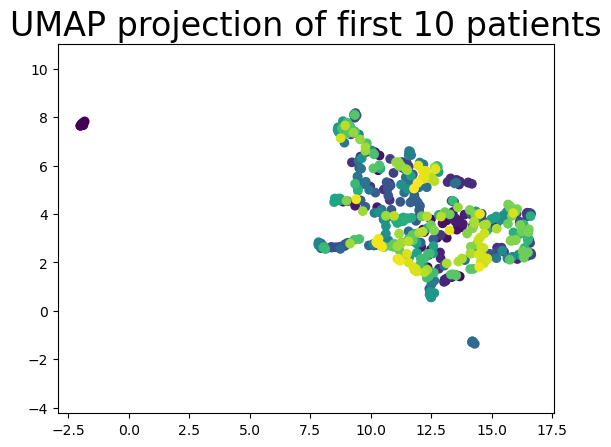

In [64]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[x for x in patids])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of first 10 patients', fontsize=24);

In [65]:
slide_meta = pd.read_csv("../metadata/slides_FS_anno.csv")

In [66]:
file_uuid = [re.sub(pattern="\\.h5", repl="", string=x) for x in files]


In [67]:
slide_meta.index = slide_meta["uuid"]

In [69]:
np.array(slide_meta.loc[file_uuid[0:50]].family)

array(['medulloblastoma_G34', 'PA and other MAPK LGGNT',
       'hemangiopericytoma', 'pituitary adenoma', 'glioblastoma',
       'glioblastoma', 'medulloblastoma_SHH', 'glioblastoma',
       'PA and other MAPK LGGNT', 'craniopharyngioma',
       'PA and other MAPK LGGNT', 'glioblastoma', 'meningioma',
       'meningioma', 'hemangioblastoma', 'astrocytoma',
       'craniopharyngioma', 'lymphoma', 'lymphoma', 'astrocytoma',
       'glioblastoma', 'pituitary adenoma', 'melanoma', 'control',
       'PA and other MAPK LGGNT', 'glioblastoma', 'meningioma',
       'PA and other MAPK LGGNT', 'glioblastoma', 'schwannoma',
       'pituicytoma', 'glioblastoma', 'PA and other MAPK LGGNT',
       'medulloblastoma_G34', 'meningioma', 'chordoma', 'astrocytoma',
       'craniopharyngioma', 'embryonal tumor with multilayered rosettes',
       'PA and other MAPK LGGNT', 'PA and other MAPK LGGNT',
       'pituitary adenoma', 'paraganglioma', 'glioblastoma', 'ependymoma',
       'oligodendroglioma', 'ast

In [20]:
tumourtype = np.concatenate([np.repeat(i,x) for (x,i) in  zip(tiles_per_pat, np.array(slide_meta.loc[file_uuid[0:10]].family))])

In [21]:
np.unique(tumourtype)

array(['PA and other MAPK LGGNT', 'craniopharyngioma', 'glioblastoma',
       'hemangiopericytoma', 'medulloblastoma_G34', 'medulloblastoma_SHH',
       'pituitary adenoma'], dtype='<U23')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


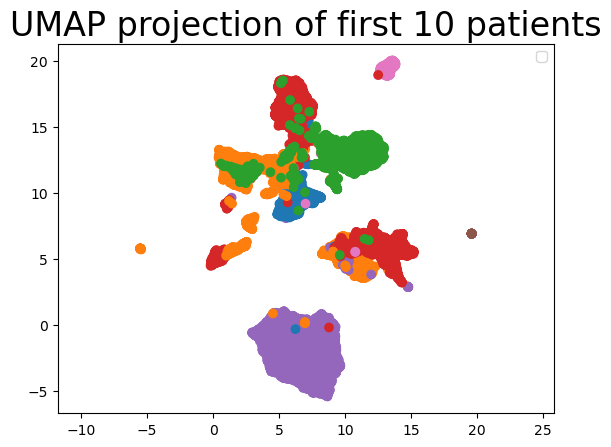

In [50]:
fig, ax = plt.subplots()
scatter = ax.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in [{'PA and other MAPK LGGNT':1, 'craniopharyngioma':2, 'glioblastoma':3, 'hemangiopericytoma':4, 'medulloblastoma_G34':5, 'medulloblastoma_SHH':6, 'pituitary adenoma':0}[y] for y in tumourtype]])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of first 10 patients', fontsize=24);
ax.legend()

In [ ]:
scatter.legend_elements()

/home/p163v/mambaforge/envs/marugoto/lib/python3.9/site-packages/matplotlib/collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


([], [])